Q3. pixabay 사이트의 이미지 다운로드하기
무료로 이미지를 다운로드 할 수 있는 멋진 사이트 중에서 많이 이용되는 곳이 바로
pixabay입니다. 이 사이트에서 특정 키워드를 입력하여 이미지를 검색한 후 컴퓨터
의 지정된 폴더로 다운로드 받는 크롤러를 작성하세요.
- 사이트 주소 : https://pixabay.com/ko/

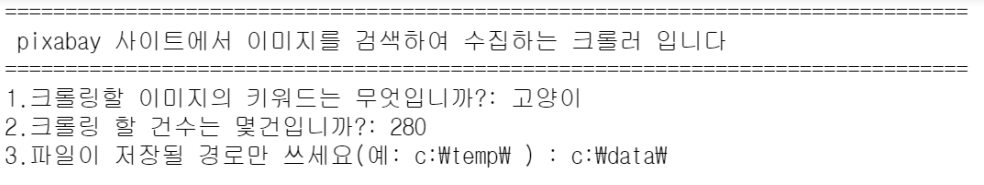
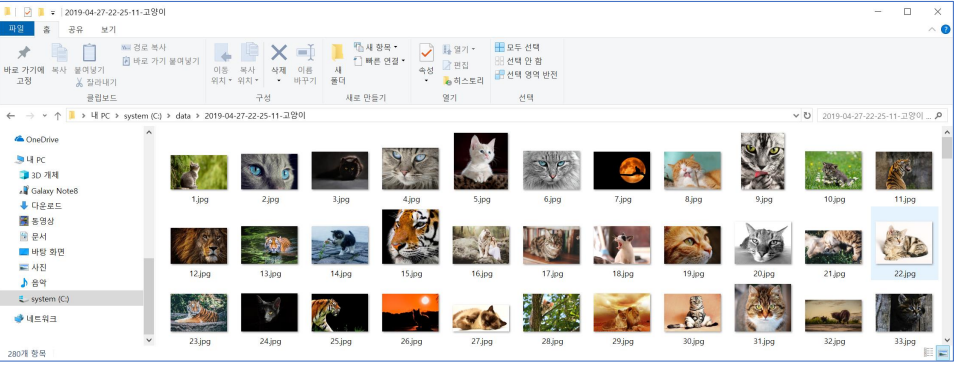

In [1]:
from bs4 import BeautifulSoup
import urllib.request
import urllib
import time
import sys
import re
import math
import os
import random

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [3]:
def scroll_down(driver, percent):
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight*%d/100);" % percent)
    time.sleep(1)

In [5]:
chrome_options = Options()
chrome_options.add_experimental_option("detach", True)
driver = webdriver.Chrome(options=chrome_options)
driver.implicitly_wait(3)

s_time = time.time( )      

driver.get("https://pixabay.com/ko/")
time.sleep(2)

print("=" *100)
print("Pixabay 사이트에서 이미지를 검색하여 수집하는 크롤러 입니다")
print("=" *100)

keyword = input("1. 크롤링할 이미지의 키워드는 무엇입니까?: ")
save_num = int(input("2. 크롤링 할 건수는 몇 건입니까?: "))
save_path = input("3. 파일을 저장할 경로만 쓰세요(예: C:/Users/사용자/Desktop): ")

if not os.path.exists(save_path):
    os.makedirs(save_path)
    print("폴더가 존재하지 않아 새로 생성하였습니다.")
else:
    print(f"입력하신 경로가 존재하여 {save_path} 폴더에 저장하겠습니다.")

now = time.localtime()
s = '%04d-%02d-%02d-%02d-%02d-%02d' % (now.tm_year, now.tm_mon, now.tm_mday, now.tm_hour, now.tm_min, now.tm_sec)

os.makedirs(save_path+s+'-'+keyword)
os.chdir(save_path+s+'-'+keyword)
f_result_dir = save_path+s+'-'+keyword

element = driver.find_element(By.NAME, 'search')
element.send_keys(keyword)
element.send_keys(Keys.ENTER)
driver.implicitly_wait(3)
time.sleep(10)

file_no = 0




headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

# 요청 객체 생성


for i in range(0, save_num):
    
    if i % 100 == 0:
        scroll_down(driver, 100)
        element = driver.find_element(By.CLASS_NAME, 'pageInput--sZUNb')
        element.clear()
        element.send_keys(i // 100 + 1)
        element.send_keys(Keys.ENTER)
        time.sleep(2)
    # urllib.request.urlretrieve(img_src2[i],str(file_no)+'.jpg')

    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    img_src = soup.find('div', 'results--mB75j').find_all('img')
        
    scroll_down(driver, i % 25 * 4)
    request = urllib.request.Request(img_src[i % 100]['src'], headers=headers)

    try:
        # 요청을 통해 응답 얻기
        with urllib.request.urlopen(request) as response:
            # 응답 내용 읽기
            image_data = response.read()

            # 파일로 저장
            with open(f"{file_no}.jpg", 'wb') as file:
                file.write(image_data)

    except urllib.error.HTTPError as e: 
        print(f"HTTP 오류 발생: {e.code} - {e.reason}")
    except urllib.error.URLError as e:
        print(f"URL 오류 발생: {e.reason}")
    
    

    file_no += 1                
    time.sleep(0.5)      
    print("%s 번째 이미지 저장중입니다=======" %file_no)
    

       
# Step 6. 요약 정보를 출력합니다                
e_time = time.time( )
t_time = e_time - s_time

store_cnt = file_no -1

print("=" *70)
print("총 소요시간은 %s 초 입니다 " %round(t_time,1))
print("총 저장 건수는 %s 건 입니다 " %file_no)
print("파일 저장 경로: %s 입니다" %f_result_dir)
print("=" *70)

driver.close( )


Pixabay 사이트에서 이미지를 검색하여 수집하는 크롤러 입니다
1 번째 이미지 저장중입니다=======
2 번째 이미지 저장중입니다=======
3 번째 이미지 저장중입니다=======
4 번째 이미지 저장중입니다=======
5 번째 이미지 저장중입니다=======
6 번째 이미지 저장중입니다=======
7 번째 이미지 저장중입니다=======
8 번째 이미지 저장중입니다=======
9 번째 이미지 저장중입니다=======
10 번째 이미지 저장중입니다=======
11 번째 이미지 저장중입니다=======
12 번째 이미지 저장중입니다=======
13 번째 이미지 저장중입니다=======
14 번째 이미지 저장중입니다=======
15 번째 이미지 저장중입니다=======
16 번째 이미지 저장중입니다=======
17 번째 이미지 저장중입니다=======
18 번째 이미지 저장중입니다=======
19 번째 이미지 저장중입니다=======
20 번째 이미지 저장중입니다=======
21 번째 이미지 저장중입니다=======
22 번째 이미지 저장중입니다=======
23 번째 이미지 저장중입니다=======
24 번째 이미지 저장중입니다=======
25 번째 이미지 저장중입니다=======
26 번째 이미지 저장중입니다=======
27 번째 이미지 저장중입니다=======
28 번째 이미지 저장중입니다=======
29 번째 이미지 저장중입니다=======
30 번째 이미지 저장중입니다=======
31 번째 이미지 저장중입니다=======
32 번째 이미지 저장중입니다=======
33 번째 이미지 저장중입니다=======
34 번째 이미지 저장중입니다=======
35 번째 이미지 저장중입니다=======
36 번째 이미지 저장중입니다=======
37 번째 이미지 저장중입니다=======
38 번째 이미지 저장중입니다=======
39 번째 이미지 저장중입니다=======
40 번째 이미지 저장중입니다=======
41 번째 이미지 저장